In [1]:
import csv
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

%matplotlib ipympl

In [2]:
csv_files = sorted(glob('*.csv'))

In [3]:
for i, csv_file in enumerate(csv_files):
    print(f'{i:02d}: {csv_file}')


csv_file = csv_files[int(input('Type in your file number\n'))]

print(csv_file)

00: (20200709)epx3.csv
01: (20200709)exp2.csv
02: (20200711)exp1.csv
03: (20200711)exp11.csv
04: (20200711)exp12.csv
05: (20200711)exp13.csv
06: (20200711)exp17.csv
07: (20200711)exp2.csv
08: (20200711)exp20.csv
09: (20200711)exp3.csv
10: (20200711)exp4.csv
11: (20200711)exp5.csv
12: (20200711)exp7.csv
13: (20200712)exp14.csv
14: (20200712)exp18.csv
15: (20200712)exp6.csv
16: (20200712)exp8.csv
17: (20200713)exp10.csv
18: (20200713)exp19.csv
19: (20200713)exp9.csv
20: (20200714)exp15.csv
21: (20200714)exp16.csv
22: exp1.csv
Type in your file number
20
(20200714)exp15.csv


In [4]:
t0_list = list()
t_list = list()
bool_list = list()
zig_p_list = list()
p_1_list = list()
p_2_list = list()
zig_1_list = list()
zig_2_list = list()

len_lines = list()

with open(csv_file, 'r') as file:
    csv_reader = csv.reader(file)
    for i, line in enumerate(csv_reader):
        if i > 0:
#             print(line)

            if len(line) > 1:
                len_lines.append(len(line))
                t_list.append(float(line[0]))
                t0_list.append(float(line[1]))
                if line[2] == 'True':
                    bool_list.append(1)
                if line[2] == 'False':
                    bool_list.append(0)
#                 print(line[2])
                zig_p_list.append([float(num) for num in line[4:7]])
                p_1_list.append([float(num) for num in line[12:15]])
                p_2_list.append([float(num) for num in line[20:23]])
                zig_1_list.append([float(num) for num in ['-' + line[29], line[28], line[30], line[27]]])
                if len(line) > 37:
                    zig_2 = [float(num) for num in ['-' + line[36], line[35], line[37], line[34]]]
                    zig_2_list.append(zig_2)
                else:
                    zig_2_list.append([np.nan, np.nan, np.nan, np.nan])
#             break
        else:
            print(line)
        

['Current Time', 'Relative Time', 'Button Pushed', 'Zig ID', 'Zig X', 'Zig Y', 'Zig Z', 'Zig Qw', 'Zig Qx', 'Zig Qy', 'Zig Qz', 'P1 ID', 'P1 X', 'P1 Y', 'P1 Z', 'P1 Qw', 'P1 Qx', 'P1 Qy', 'P1 Qz', 'P2 ID', 'P2 X', 'P2 Y', 'P2 Z', 'P2 Qw', 'P2 Qx', 'P2 Qy', 'P2 Qz', 'Zig 1 ID', 'Zig 1 X', 'Zig 1 Y', 'Zig 1 Z', 'Zig 1 Yaw', 'Zig 1 Pitch', 'Zig 1 Distance', 'Zig 2 ID', 'Zig 2 X', 'Zig 2 Y', 'Zig 2 Z', 'Zig 2 Yaw', 'Zig 2 Pitch', 'Zig 2 Distance']


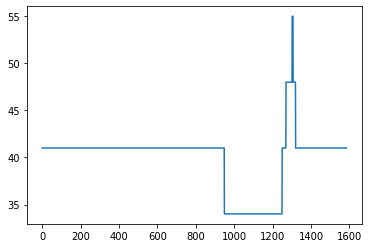

In [5]:
plt.figure()
plt.plot(len_lines)
plt.show()

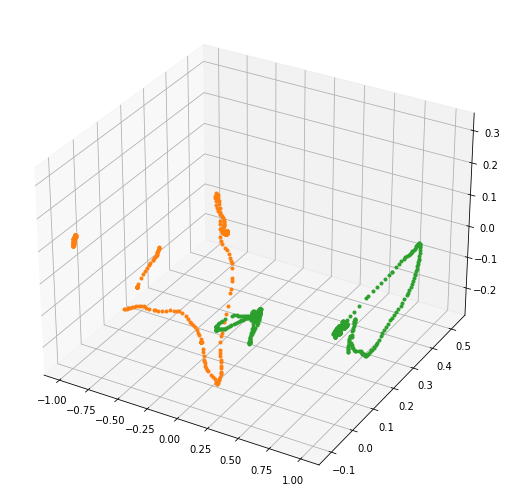

In [6]:
fig = plt.figure(figsize=(9, 9))
ax = fig.gca(projection='3d')

data = np.asarray(zig_p_list)
ax.plot(data[:, 0], 
        data[:, 1], 
        data[:, 2], 
        '.',
        linewidth=1)

data = np.asarray(p_1_list)
ax.plot(data[:, 0], 
        data[:, 1], 
        data[:, 2], 
        '.',
        linewidth=1)

data = np.asarray(p_2_list)
ax.plot(data[:, 0], 
        data[:, 1], 
        data[:, 2], 
        '.',
        linewidth=1)

# ax.legend()

plt.show()

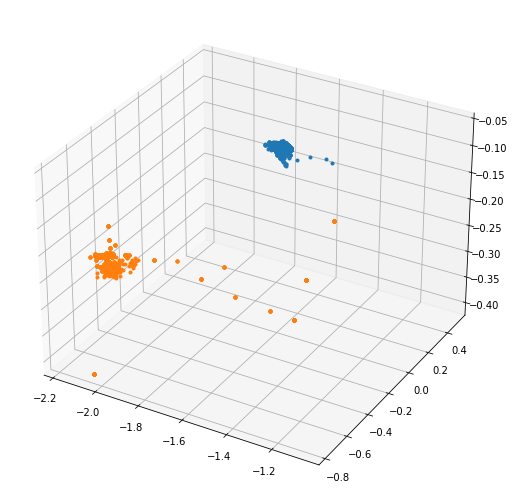

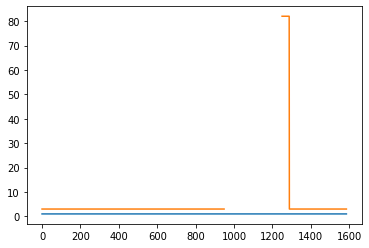

In [7]:
fig = plt.figure(figsize=(9, 9))
ax = fig.gca(projection='3d')

data_ = np.asarray(zig_1_list)
ax.plot(data_[:, 0], 
        data_[:, 1], 
        data_[:, 2], 
        '.',
        linewidth=1)

data = np.asarray(zig_2_list)
ax.plot(data[:, 0], 
        data[:, 1], 
        data[:, 2],
        '.',
        linewidth=1)

# ax.legend()

# plt.show()


plt.figure()
plt.plot(data_[:, 3])
plt.plot(data[:, 3])
plt.show()

(1586, 4)
(1585, 4)


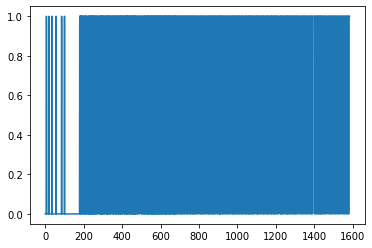

In [8]:
print(data_.shape)
print(np.diff(data_, axis=0).shape)

boolean = [elem[0] == 0 and elem[1] == 0 and elem[2] == 0 for elem in np.diff(data_, axis=0)]

plt.figure()
plt.plot(boolean)
plt.show()

In [9]:
# fig = plt.figure(figsize=(9, 9))
# ax = fig.gca(projection='3d')

# data_ = np.asarray(zig_1_list)
# ax.plot(np.diff(data_[:, 0]), 
#         np.diff(data_[:, 1]), 
#         np.diff(data_[:, 2]), 
#         '.',
#         linewidth=1)

# data = np.asarray(zig_2_list)
# ax.plot(np.diff(data[:, 0]), 
#         np.diff(data[:, 1]), 
#         np.diff(data[:, 2]),
#         '.',
#         linewidth=1)

# plt.show()

[ 0.99926   0.036652 -0.011608]
[-1.55660951  0.43133137 -0.1685856   1.        ]


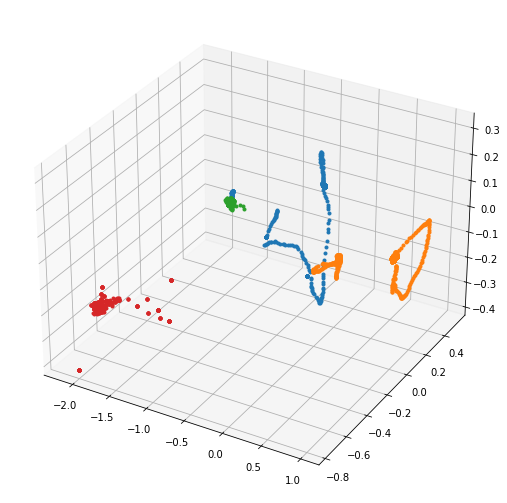

In [10]:
fig = plt.figure(figsize=(9, 9))
ax = fig.gca(projection='3d')

data_0 = np.asarray(zig_p_list)
# ax.plot(data[:, 0], 
#         data[:, 1], 
#         data[:, 2], 
#         linewidth=1)

data = np.asarray(p_1_list)
ax.plot(data[:, 0], 
        data[:, 1], 
        data[:, 2], 
        '.',
        linewidth=1)

data = np.asarray(p_2_list)
ax.plot(data[:, 0], 
        data[:, 1], 
        data[:, 2], 
        '.',
        linewidth=1)

print(data[0])

data = np.asarray(zig_1_list)
ax.plot(data[:, 0], 
        data[:, 1], 
        data[:, 2], 
        '.',
        linewidth=1)

print(data[0])

data = np.asarray(zig_2_list)
ax.plot(data[:, 0], 
        data[:, 1], 
        data[:, 2], 
        '.',
        linewidth=1)

# ax.legend()

plt.show()

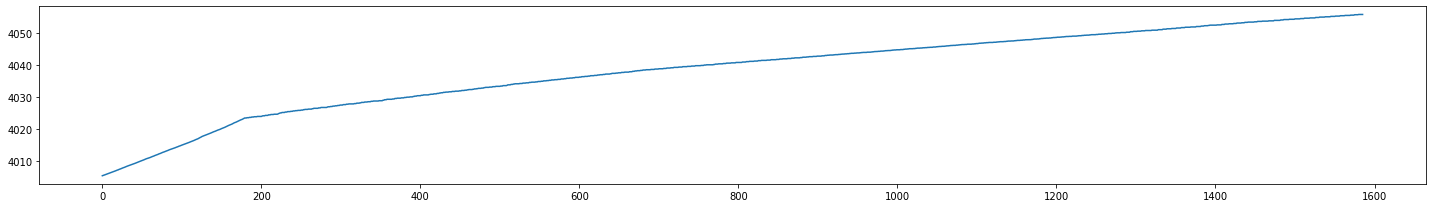

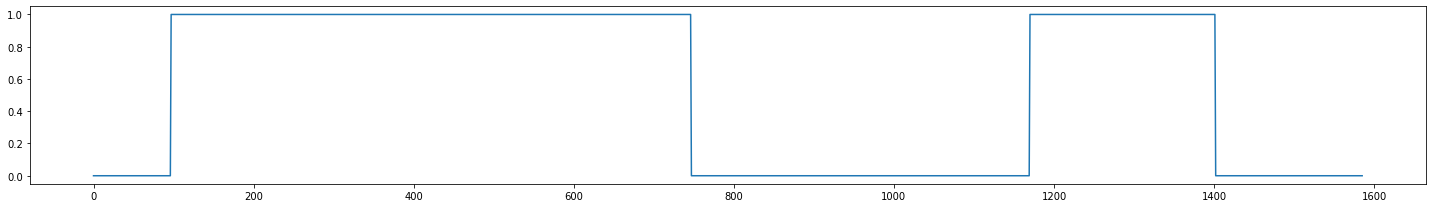

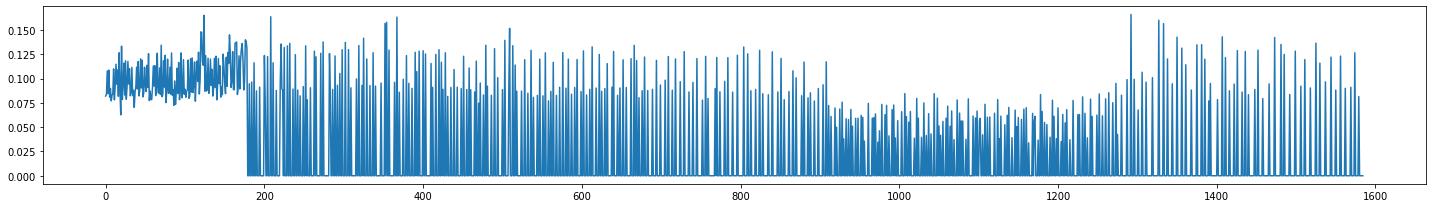

/Users/joowhan/opt/anaconda3/envs/py3_env/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


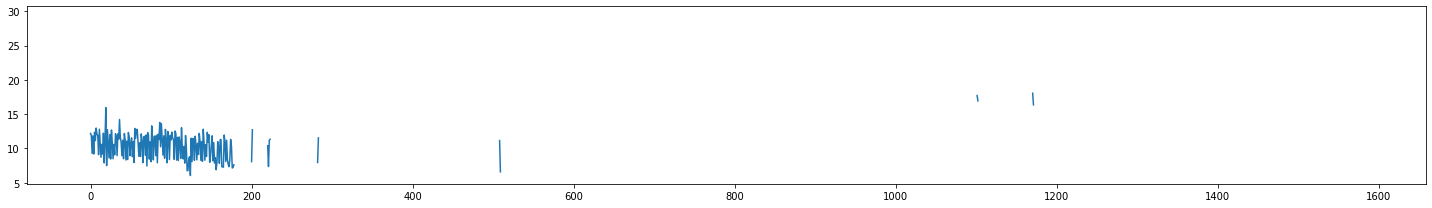

In [11]:
plt.figure(figsize = (20, 3))
plt.plot(t_list)
plt.tight_layout()
plt.show()

plt.figure(figsize = (20, 3))
plt.plot(bool_list)
plt.tight_layout()
plt.show()


plt.figure(figsize = (20, 3))
plt.plot(np.diff(t_list))
plt.tight_layout()
plt.show()




plt.figure(figsize = (20, 3))
plt.plot(1 / np.diff(t_list))
plt.tight_layout()
plt.show()



In [12]:
t0_list[-1] / len(t0_list) 

0.03170136759142504

In [13]:
len(t0_list) / t0_list[-1]

31.544380447185876

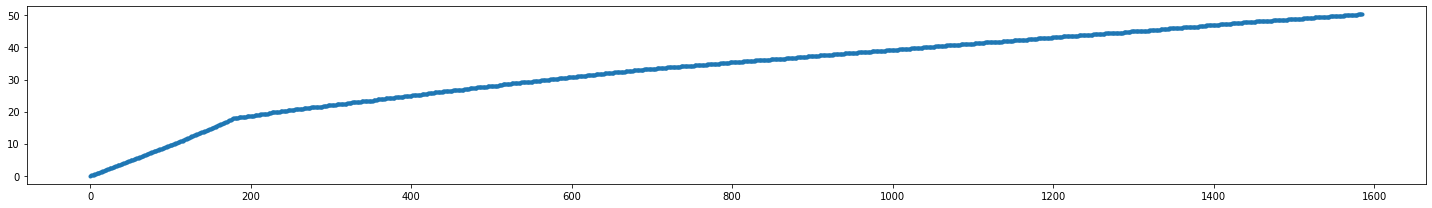

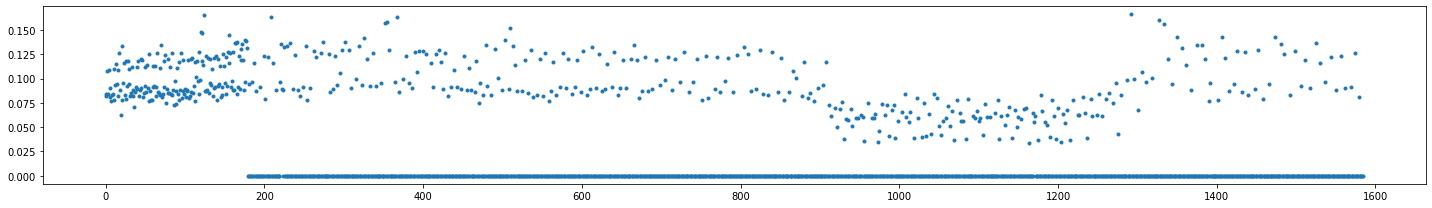

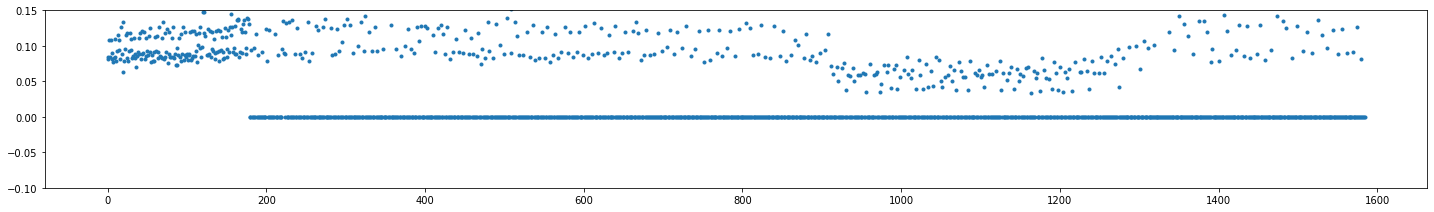

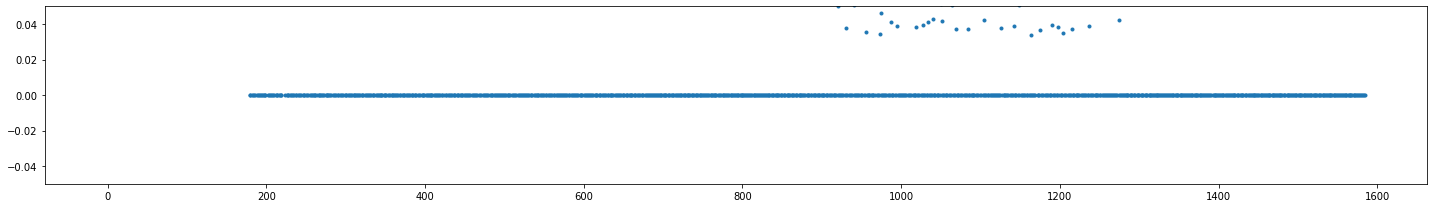

/Users/joowhan/opt/anaconda3/envs/py3_env/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


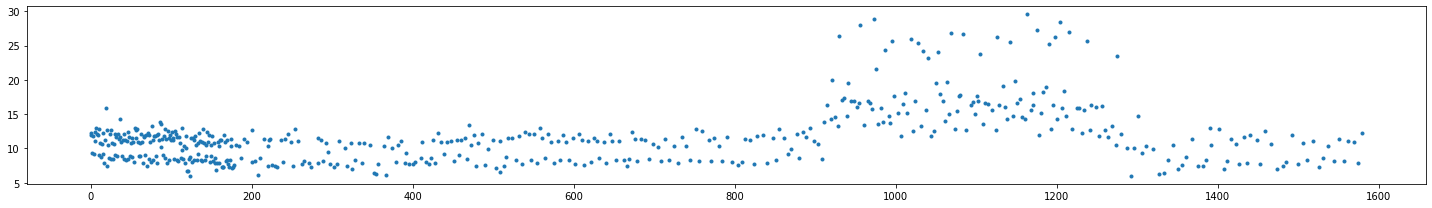

In [14]:
plt.figure(figsize = (20, 3))
plt.plot(t0_list, '.')
plt.tight_layout()
plt.show()

plt.figure(figsize = (20, 3))
plt.plot(np.diff(t0_list), '.')
plt.tight_layout()
plt.show()

plt.figure(figsize = (20, 3))
plt.plot(np.diff(t0_list), '.')
plt.tight_layout()
plt.ylim([-0.1, 0.15])
plt.show()

plt.figure(figsize = (20, 3))
plt.plot(np.diff(t0_list), '.')
plt.tight_layout()
plt.ylim([-0.05, 0.05])
plt.show()

plt.figure(figsize = (20, 3))
plt.plot(1 / np.diff(t0_list), '.')
plt.tight_layout()
plt.show()
